In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import statsmodels.api as sm
import numpy as np

import matplotlib
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
PID = pd.read_csv('MostRecentUpdate/Police_Killings_and_Police_Inolved_Deaths.csv',
                  index_col=['date'],parse_dates=['date'])

FNA = ['first_name','last_name','department','race','gender']
PID[FNA] = PID[FNA].fillna('Not Specified')

# PID.shape




In [3]:

replace_Keys={'Replace_Keys':{
    'Aboriginal':'Indigenous',
    'Household Population For':'N',
    ' - ':' ',
    'Total visible minority population':'Total',
    'Total Household Population for':'N',
    'Total Population':'Population',
},
  'Columns':{},
    
}
with open('Spatial_Data/CensusNames.json', 'w') as fp:
    json.dump(replace_Keys, fp)

In [4]:
# Boundary = 'C:\\Users\\User\\Data-Normalization-Classification\\Inputs\\Canadian_Census_Boundaries_2016.shp'
# CA = gpd.read_file(Boundary)
# CA.geometry = CA.simplify(1000)
# CA.to_file('Spatial_Data/CA_Boundary.shp')

Boundary = 'Spatial_Data/CA_Boundary.shp'
CA = gpd.read_file(Boundary)
can_province_abbrev = {
          'Alberta': 'AB',
          'British Columbia': 'BC',
          'Manitoba': 'MB',
          'New Brunswic': 'NB',
          'New Brunswick': 'NB',
          'Newfoundland and Labrador': 'NL',
          'Northwest Territories': 'NT',
          'Nova Scotia': 'NS',
          'Nunavut': 'NU',
          'Ontario': 'ON',
          'Prince Edward Island': 'PE',
          'Quebec': 'QC',
            'Québec':'QC',
          'Saskatchewan': 'SK',
          'Yukon': 'YT',
            'Yukon Territory':'YT'
        }

CA['Abrev'] = CA['PRNAME'].replace(can_province_abbrev)
# CA['Abrev']

Set = PID.loc[PID.index.year>=2016].copy()
CA = CA.set_index('Abrev')
CA = CA.join(Set.groupby('prov').count()[['INDEX']])
CA = CA.rename(columns={'INDEX':'AllDeath'})
CA = CA.join(Set.loc[Set['Type']=='Police Killing'].groupby('prov').count()[['INDEX']])
CA = CA.rename(columns={'INDEX':'Killing'})
# CA.plot(column='Killing')

In [5]:
with open('Spatial_Data/CensusNames.json', 'r') as fp:
    name_Keys = json.load(fp)
name_Keys
Path = 'Spatial_Data/2016/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_02_33_01_647cde6efbb2fc246c3d34145d589ea7'

Census_2016 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values
name_Keys
for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()

name_Keys['Columns']['2016']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2016'][row[0]]=row['Name']
name_Keys

Cols_2016 = list(name_Keys['Columns']['2016'].values())
Census_2016=Census_2016.rename(columns=name_Keys['Columns']['2016'])
Census_2016[Cols_2016].sum()

C:\Users\User\.conda\envs\geo-env\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


indigenous_identity        1673791.0
n_indigenous_identity     34460068.0
females                   17887524.0
males                     17264204.0
population                35151728.0
visible_minority_black     1198540.0
n_visible_minority        34460068.0
visible_minority_total     7674575.0
dtype: float64

In [6]:
with open('Spatial_Data/CensusNames.json', 'r') as fp:
    name_Keys = json.load(fp)
name_Keys
Path = 'Spatial_Data/2019/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_05_22_49_491bf9a4259930aa7a779d25dae4fb09'

Census_2019 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values
name_Keys
for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()

name_Keys['Columns']['2019']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2019'][row[0]]=row['Name']
name_Keys

Cols_2019 = list(name_Keys['Columns']['2019'].values())
print(Cols_2019)
Census_2019=Census_2019.rename(columns=name_Keys['Columns']['2019'])
Census_2019[Cols_2019].sum()

['indigenous_identity', 'n_indigenous_identity', 'population', 'females', 'males', 'visible_minority_black', 'n_visible_minority', 'visible_minority_total']


indigenous_identity        1826555.0
n_indigenous_identity     36750837.0
population                37465430.0
females                   18887670.0
males                     18577760.0
visible_minority_black     1527504.0
n_visible_minority        36750837.0
visible_minority_total     9332201.0
dtype: float64

In [7]:

Path = 'Spatial_Data/2021/'
FileName = 'SimplyAnalytics_Shapefiles_2021-10-29_02_33_29_b1bb73ed1b44115f5efc8f2d899d4b13'

Census_2021 = gpd.read_file(Path +FileName+'.shp')
Cols=pd.read_csv(Path+'variable_names.txt',sep='	#',header=None)
Cols['Name']=Cols[1].str.split("|").str[-1].str.split(', ').str[0].str[1:]#.str.replace(name_Keys['Replace_Keys']).values

for old, new in name_Keys['Replace_Keys'].items():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
name_Keys['Columns']['2021']={}
for i,row in Cols.iterrows():
    Cols['Name'] = Cols['Name'].str.replace(old, new, regex=False)
Cols['Name'] = Cols['Name'].str.replace(' ', '_', regex=False)
Cols['Name'] = Cols['Name'].str.lower()
    

name_Keys['Columns']['2021']={}
for i,row in Cols.iterrows():
    name_Keys['Columns']['2021'][row[0]]=row['Name']
name_Keys
    
Cols_2021 = list(name_Keys['Columns']['2021'].values())
Census_2021=Census_2021.rename(columns=name_Keys['Columns']['2021'])
# print(Cols_2021)
# with open('Spatial_Data/CensusNames.json', 'w') as fp:
#     json.dump(name_Keys, fp)
# name_Keys
Diff = (Census_2021[Cols_2021].sum().sort_index(ascending=False)-Census_2016[Cols_2021].sum().sort_index(ascending=False))
print(Diff/1e6)

Census_2021['Abrev']=Census_2021['name'].replace(can_province_abbrev)
Census_2021=Census_2021.set_index(Census_2021['Abrev'])

CA = CA.join(Census_2021[Cols_2021])
CA

visible_minority_total    1.839401
visible_minority_black    0.362945
population                2.982502
n_visible_minority        2.948565
n_indigenous_identity     2.948565
males                     1.684095
indigenous_identity       0.190306
females                   1.298407
dtype: float64


,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,AREA_LCC,AREA_AEA,Area_Merc,geometry,AllDeath,Killing,indigenous_identity,n_indigenous_identity,population,females,males,visible_minority_black,n_visible_minority,visible_minority_total
Abrev,,,,,,,,,,,,,,,,,,,,
NL,10,Newfoundland and Labrador,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,397598.0,406998.00,1124050.0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",3,3.0,45535.0,506318.0,513653.0,260214.0,253439.0,2817.0,506318.0,13759.0
PE,11,Prince Edward Island,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,6023.0,5893.29,12384.0,"MULTIPOLYGON (((8435711.754 1679935.966, 84368...",1,1.0,3663.0,156966.0,160374.0,81288.0,79086.0,950.0,156966.0,9236.0
NS,12,Nova Scotia,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,57534.5,55643.30,111891.0,"MULTIPOLYGON (((8470851.646 1624745.011, 84711...",9,6.0,54909.0,963101.0,978623.0,499896.0,478727.0,25412.0,963101.0,74454.0
NB,13,New Brunswic,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,74525.4,73050.60,154848.0,"MULTIPOLYGON (((8176224.537 1722553.460, 81783...",6,4.0,32145.0,762959.0,779582.0,394491.0,385091.0,9240.0,762959.0,30185.0
QC,24,Quebec,Quebec,Québec,Que.,Qc,1476350.0,1509750.00,4309780.0,"MULTIPOLYGON (((8399709.494 2261445.703, 84007...",103,54.0,205154.0,8357074.0,8565732.0,4284500.0,4281232.0,425227.0,8357074.0,1278498.0
ON,35,Ontario,Ontario,Ontario,Ont.,Ont.,980244.0,986723.00,2448600.0,"MULTIPOLYGON (((6378815.614 2295412.440, 63790...",177,91.0,423416.0,14588977.0,14804681.0,7490941.0,7313740.0,774933.0,14588977.0,4744583.0
MB,46,Manitoba,Manitoba,Manitoba,Man.,Man.,627595.0,649630.00,1979250.0,"MULTIPOLYGON (((6039656.509 2636304.343, 60379...",39,23.0,237073.0,1348547.0,1387557.0,694092.0,693465.0,44149.0,1348547.0,284543.0
SK,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,632214.0,652385.00,1940680.0,"POLYGON ((5248633.914 2767057.263, 5347441.509...",30,17.0,189415.0,1160414.0,1188823.0,589857.0,598966.0,23169.0,1160414.0,174835.0
AB,48,Alberta,Alberta,Alberta,Alta.,Alb.,639937.0,663251.00,2044880.0,"POLYGON ((5228304.177 2767597.891, 4890689.760...",85,66.0,287431.0,4384756.0,4479459.0,2227586.0,2251873.0,196335.0,4384756.0,1246125.0


In [8]:
Time = 1#(((PID.index.max()-pd.DatetimeIndex([str(Set.index.year.min())+'-01-01']))).days.values[0]/365)
CA['Killing_Rate'] = (CA['Killing']/CA['population']*1e6/Time)
CA['AllDeath_Rate'] = (CA['AllDeath']/CA['population']*1e6/Time)

# CA['Killing_Rate'].sort_values()
CA['AllDeath_Rate'].sort_values()

Abrev
NL      5.840519
PE      6.235425
NB      7.696432
NS      9.196596
ON     11.955678
QC     12.024658
AB     18.975506
BC     20.973228
SK     25.235043
MB     28.106953
NT     44.621941
YT     47.771461
NU    176.602669
Name: AllDeath_Rate, dtype: float64

In [9]:
North_Pop = CA.loc[((CA.population<=1e5)),'population'].sum()
North_Deaths = CA.loc[((CA.population<=1e5)),'AllDeath'].sum()
# North
CA.loc[((CA.population<=1e5)),'AllDeath_Rate'] = North_Deaths/North_Pop*1e6
# CA['population'].sort_values()
CA[['AllDeath','AllDeath_Rate']].sort_values(by='AllDeath_Rate')
# CA

,AllDeath,AllDeath_Rate
Abrev,,
NL,3,5.840519
PE,1,6.235425
NB,6,7.696432
NS,9,9.196596
ON,177,11.955678
QC,103,12.024658
AB,85,18.975506
BC,108,20.973228
SK,30,25.235043


In [10]:

# print(CA['AllDeath_Rate'])
print(PID.loc[PID['prov']=='NL',['prov','city_town','first_name','last_name','age']])

           prov            city_town first_name last_name   age
date                                                           
2000-10-16   NL          Cornerbrook     Darryl     Power  23.0
2015-04-05   NL      Mitchells Brook        Don    Dunphy  59.0
2018-01-28   NL  Grand Falls-Windsor        Roy   Freake   37.0
2018-11-27   NL         Corner Brook     Jorden     McKay  27.0
2021-06-11   NL  Grand Falls-Windsor        Roy    Freake  37.0
2000-08-26   NL      Little Catalina     Norman      Reid  43.0


['1-10', '10-50', '50-100', '100 - 177']
Categories (4, object): ['1-10' < '10-50' < '50-100' < '100 - 177']

['<10', '10-20', '20-30', '>30']
Categories (4, object): ['<10' < '10-20' < '20-30' < '>30']



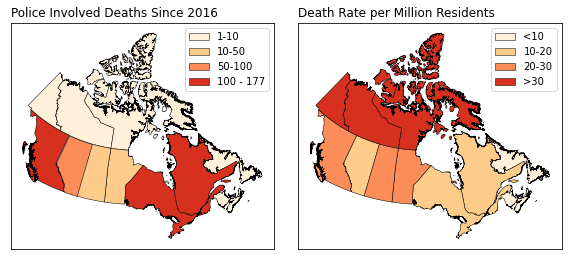

In [11]:

fig,axes=plt.subplots(1,2,figsize=(8,4))
# Plots = (axes[0,0],axes[0,1],axes[1,0],axes[1,1])
# columns = ['AllDeath','Killing','AllDeath_Rate','Killing_Rate']
# Titles = ['Police Involved Deaths','Police Killings','Police Involved Death Rate','Police Killing Rate']
Plots = [axes[0],axes[1]]
columns = ['AllDeath','AllDeath_Rate']
Titles = ['Police Involved Deaths Since 2016','Death Rate per Million Residents']

Break = '_MB'


Totals = [0,10,50,100,200]
Totals_L = ['1-10','10-50','50-100','100 - '+str(CA['AllDeath'].max())]
Rates = [0,10,20,30,200]
Rates_L = ['<10','10-20','20-30','>30']
# Totals = [0,25,100,200,500
# Totals_L = ['<=25','26-100','101-200','>200']
# Rates = [0,.5,1,2,100]
# Rates_L = ['<=0.5','>0.5-1.0','>1.0-2.0','>2.0']

Manual_Bins_list = {'AllDeath':Totals,
                    'Killing':Totals,
                    'AllDeath_Rate':Rates,
                    'Killing_Rate':Rates}
Manual_Labels_list = {'AllDeath':Totals_L,
                    'Killing':Totals_L,
                    'AllDeath_Rate':Rates_L,
                    'Killing_Rate':Rates_L}
quantiles=4
for Title, column,ax in zip(Titles, columns,Plots):
    Map_Col=column+Break
    if column.split('_')[-1]=='Rate':
        CA[Map_Col] = pd.qcut(CA[column],
                q=quantiles,
                duplicates='drop'
                           ).apply(lambda x: pd.Interval(left=(round(x.left,1)), right=(round(x.right,1))))

    else:
        CA[Map_Col] = pd.qcut(CA[column],
                q=quantiles,
                duplicates='drop'
                           ).apply(lambda x: pd.Interval(left=int(round(x.left,1)), right=int(round(x.right,1))))

    if Break == '_MB':
        CA[Map_Col] = pd.cut(CA[column],
                                    bins=Manual_Bins_list[column],
                                    labels=Manual_Labels_list[column],
                                    include_lowest=True,
                                    duplicates='drop'
                                               )
        
    labels=CA[Map_Col].unique().sort_values()
    print(labels)

#     colors=['#fef0d9',#'#fdcc8a',
#             '#fc8d59',#'#e34a33',
#             '#b30000']
    colors=[
    '#fef0d9',
    '#fdcc8a',
    '#fc8d59',
    '#d7301f',
    ]
    Combined_Color = {key:value for key,value in zip(labels,colors)}

    Combined_Patches = []
    labels=CA[Map_Col].unique().sort_values()
    print()

    for i,klass in enumerate(CA[Map_Col].unique().sort_values()):
#         print(klass)
#     #     try:
#         print(i)
#         print(str(labels[i])[0])
        if i == 5:
            kwargs = {'facecolor':Combined_Color[klass],
                     'edgecolor':'black',
                     'linewidth':.5,
                     'label':'> '+str(labels[i])}
        elif i == 0:
            kwargs = {'facecolor':Combined_Color[klass],
                     'edgecolor':'black',
                     'linewidth':.5,
                     'label':str(labels[i])}
        else:
            kwargs = {'facecolor':Combined_Color[klass],
                     'edgecolor':'black',
                     'linewidth':.5,
                     'label':str(labels[i])}
    # #     print(Data.Combined.loc[Data.Combined[Rate+'_Rate_MB']==klass].index)
        CA.loc[CA[Map_Col]==klass].plot(
            ax=ax,
            **kwargs
                 )
        Combined_Patches.append(mpatches.Patch(**kwargs))
    #     except:
    #         pass

    # #     print(Combined_Patches)
    if column.split('_')[-1]=='Rate':
        ax.legend(handles=(Combined_Patches), loc='upper right')#,title='Rate')
    else:
        ax.legend(handles=(Combined_Patches), loc='upper right')#,title='Total')

    plt.tight_layout()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(Title,loc='left')#: January 2000 - Present\
# plt.suptitle('Police Involved Deaths (Since 2016)')

# CA.loc[CA[Map_Col]==klass]
# axes[0].text(0,-0.1, "Source: https://police-involved-deaths-ca.github.io/Data/  By: June Skeeter (Nov 8, 2021)", size=10, ha="left", 
#          transform=axes[0].transAxes)
# axes[1].text(0,-0.1, "Map Created By: June Skeeter (Nov 1, 2021)", size=10, ha="left", 
#          transform=axes[1].transAxes)

plt.savefig('docs/images/PID_by_Prov.png',dpi=400)


In [12]:
name_Keys['Pop_Trend']={}
# X = sm.add_constant(X)
for c in Cols_2021:
    Y = [Census_2016[c].sum(),Census_2019[c].sum(),Census_2021[c].sum()]
    if c == 'population':
        X = [2016,2019,2021,2011,2006,2001]
        for v in [33476688,31612897,30007094]:
            Y.append(v)
    else:
        X = [2016,2019,2021]
    X = sm.add_constant(X)
#     print(X,Y)
        
    model = sm.OLS(Y,X)
    results = model.fit()
    name_Keys['Pop_Trend'][c]=results.params#[1]
# print(name_Keys['Pop_Trend'])

In [13]:
Daily = PID.groupby(PID.index).count().resample('D').asfreq()
Daily['Days']=1
# print(Daily)
Yearly = Daily.resample('Y').count()
# print(Yearly)
Scale = 1e6
Days = Yearly['Days'].max()
Death_Rate = []
Killing_Rate = []
Years = []
for y in range(2000,2023):
    Length = (Days/Yearly.loc[Yearly.index.year==y,'Days'].values[0])
    Years.append(str(y)+'-1-1')
    PM=((y*name_Keys['Pop_Trend']['population'][1]+name_Keys['Pop_Trend']['population'][0])/Scale)
    Death_Rate.append(((Yearly.loc[Yearly.index.year==y,'INDEX']/PM).values*Length)[0])
    
Daily = PID.loc[PID['Type']=='Police Killing'].groupby(PID.loc[PID['Type']=='Police Killing'].index).count().resample('D').asfreq()
Daily['Days']=1
Yearly = Daily.resample('Y').count()
Scale = 1e6
Days = Yearly['Days'].max()
for y in range(2000,2023):
    Length = (Days/Yearly.loc[Yearly.index.year==y,'Days'].values[0])
    PM=((y*name_Keys['Pop_Trend']['population'][1]+name_Keys['Pop_Trend']['population'][0])/Scale)
    Killing_Rate.append(((Yearly.loc[Yearly.index.year==y,'INDEX']/PM).values*Length)[0])
print(len(Years))    
Rate = pd.DataFrame(data={'date':Years,'PID_Rate':Death_Rate,'Killing_Rate':Killing_Rate})
# print(Rate)
Rate = Rate.set_index(pd.DatetimeIndex(Rate['date']))
# Rate

23


date
1987-01-20    Police Involved Death
1987-02-02    Police Involved Death
1987-02-08    Police Involved Death
1987-04-05    Police Involved Death
1987-04-16    Police Involved Death
                      ...          
2020-10-04           Police Killing
2020-10-08           Police Killing
2016-02-26    Police Involved Death
2000-02-18    Police Involved Death
2021-12-28    Police Involved Death
Name: Type, Length: 1525, dtype: object


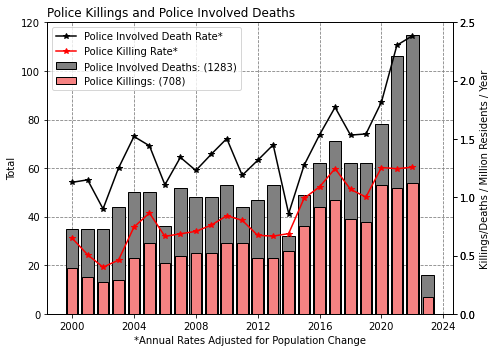

In [14]:
Class = 'Type'
print(PID['Type'])
# print(PID.loc[((PID.index.year>=2000))])
fig,ax=plt.subplots(1,figsize=(7,5))


Y = PID.loc[((PID.index.year>=2000))].resample('YS').count()['INDEX']
ax.bar(Y.index,Y,width = 300,edgecolor='k',facecolor='grey',label='Police Involved Deaths: ('+str(Y.sum())+')')
x2=ax.twinx()
x2.plot(Rate['PID_Rate'],color='k',marker='*',label='Police Involved Death Rate*')
ax.plot(Rate['PID_Rate']*np.nan,color='k',marker='*',label='Police Involved Death Rate*')
x2.set_ylim(0,2.5)
# ax.set_title('All Police Involved Deaths')




Y = PID.loc[((PID.index.year>=2000)&
            (PID.Type=='Police Killing'))].resample('YS').count()['INDEX']
ax.bar(Y.index,Y,width = 250,edgecolor='k',facecolor='#f58282',label='Police Killings: ('+str(Y.sum())+')' )
x2=ax.twinx()
x2.plot(Rate['Killing_Rate'],color='#ff0000',marker='*',label='Police Killing Rate*')
ax.plot(Rate['Killing_Rate']*np.nan,color='#ff0000',marker='*',label='Police Killing Rate*')
x2.set_ylim(0,2.5)
ax.set_ylim(0,120)
ax.set_axisbelow(True)
ax.grid(color='grey', linestyle='--')
ax.set_ylabel('Total')
x2.set_ylabel('Killings/Deaths / Million Residents / Year')
ax.legend()
ax.set_title('Police Killings and Police Involved Deaths',loc='left')
ax.set_xlabel('*Annual Rates Adjusted for Population Change')
plt.tight_layout()
plt.savefig('docs/images/Annual.png',dpi=400)

circumstances_of_death
Other Killings      169
Traffic Incident    199
Other Deaths        381
Shooting            534
Name: INDEX, dtype: int64


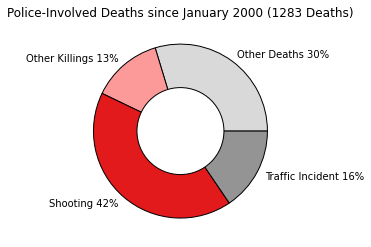

In [15]:

def Doughnut(Set,Colors,ax):
    names = []
    size = []
    colors = []
    if Colors == 'Random':
        for a,s in zip(Set.index.values,Set.values):
            names.append(a+' '+str(int(np.round(s/np.sum(Set.values)*100,0)))+'%')
            size.append(s)
            colors.append(np.random.rand(3))
    else:
        for a,s in zip(Set.index.values,Set.values):
            names.append(a+' '+str(int(np.round(s/np.sum(Set.values)*100,0)))+'%')
            size.append(s)
            colors.append(Colors[a])
    my_circle=plt.Circle( (0,0), 0.5, facecolor='white',edgecolor='k')
    ax.pie(size, labels=names, colors=colors,wedgeprops={"edgecolor":"k"})
    ax.add_artist(my_circle)

Final_Data = PID.loc[PID.index.year>=2000].copy()

Final_Data['cause_death'] = Final_Data['cause_death'].fillna('')


Rep = {
       'Starlight Tour':'Other Killings', 
       'Post-Intervention':'Other Deaths', 
       'Dangerous Driving':'Traffic Incident',
       'Police Involved Death':'Other Deaths', 
       'Off-Duty/Retired':'Other Deaths', 
       'Pursuit':'Traffic Incident',
       'Intervention':'Other Deaths', 
       'Use of Force':'Other Killings',
       'In Custody':'Other Deaths',
       'Shotting':'Other Deaths',
       'Altercation':'Other Killings',
       'Wellness Check':'Other Deaths',
       'Restraint/Force':'Other Killings',
       'Medical Distress':'Other Deaths', #**********
       'Motorist Hit by Cruiser':'Traffic Incident',#**********
       'Pedestrian Hit by Cruiser':'Traffic Incident',#**********
      }

Final_Data['circumstances_of_death'] = Final_Data['circumstances_of_death'].replace(Rep)

Death_Cat=Final_Data.groupby('circumstances_of_death').count()['INDEX']

# print(Death_Cat.sort_values().index)

Color_Scheme = {'Shooting':'#e31a1c','Other Killings':'#fb9a99','Other Deaths':'#d9d9d9',
#                 'In Custody':'#a6cee3',
                'Traffic Incident':'#949494'}


Death_Cat=Final_Data.groupby('circumstances_of_death').count()['INDEX']

print(Death_Cat.sort_values())



fig,ax=plt.subplots(1,1,figsize = (6.65,4))
Doughnut(Death_Cat,Color_Scheme,ax)
ax.set_title('Police-Involved Deaths since January 2000 ('+str(Death_Cat.sum())+' Deaths)')

plt.savefig('docs/images/Distribtution.png',dpi=400)

,INDEX,id_victim,first_name,last_name,middle_name,age,gender,race,ethnic_ancestry,immigrant_refugee_naturalized,...,ID,data_source,extra_source,link,name,day_week,location_type,summary,ds_rank,Type
date,,,,,,,,,,,,,,,,,,,,,
2000-03-17,240,240_KCC,Robert-Paul,Garrette,NaN,40.0,Not Specified,Not Specified,Not Specified,NaN,...,722_KCC,killerCopsCanada,LaCRAP,NaN,NaN,NaN,NaN,NaN,NaN,Police Involved Death
2000-03-27,241,241_KCC,Patrice,Poirier,NaN,30.0,Not Specified,Not Specified,Not Specified,NaN,...,658_KCC,killerCopsCanada,LaCRAP,NaN,NaN,NaN,NaN,NaN,NaN,Police Involved Death
2000-04-29,242,242_KCC,Marc,Bergeron,NaN,32.0,Not Specified,Not Specified,Not Specified,NaN,...,659_KCC,killerCopsCanada,LaCRAP,NaN,NaN,NaN,NaN,NaN,NaN,Police Involved Death
2000-07-11,244,244_KCC,Martin,Perron,NaN,24.0,Not Specified,Not Specified,Not Specified,NaN,...,723_KCC,killerCopsCanada,LaCRAP,NaN,NaN,NaN,NaN,NaN,NaN,Police Involved Death
2000-08-10,249,249_KCC,Sabina,Gagnon,NaN,18.0,Not Specified,Not Specified,Not Specified,NaN,...,907_KCC,killerCopsCanada,LaCRAP,NaN,NaN,NaN,NaN,NaN,NaN,Police Involved Death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-07,771,771_KCC,Pierre,Mailhot,NaN,44.0,Not Specified,Not Specified,Not Specified,NaN,...,762_KCC,killerCopsCanada,LaCRAP,NaN,NaN,NaN,NaN,NaN,NaN,Police Involved Death
2014-07-25,786,786_KCC,Sylvain,Brazeau,NaN,35.0,Not Specified,Not Specified,Not Specified,NaN,...,717_KCC,killerCopsCanada,LaCRAP,NaN,NaN,NaN,NaN,NaN,NaN,Police Involved Death
2015-07-18,818,818_KCC,Cecile,Lalancette,NaN,89.0,Not Specified,Not Specified,Not Specified,NaN,...,718_KCC,killerCopsCanada,LaCRAP,NaN,NaN,NaN,NaN,NaN,NaN,Police Involved Death


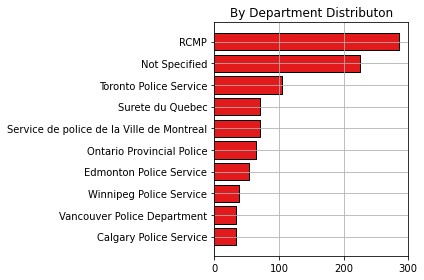

In [16]:
PID.groupby('first_name').count()['INDEX']
B = Final_Data.groupby('department').count()['INDEX'].sort_values()[-10:]

fig,ax=plt.subplots()
ax.barh(B.index,B,color='#e31a1c',edgecolor='k')
ax.grid()
ax.set_title('By Department Distributon')
plt.tight_layout()

plt.savefig('docs/images/Departments.png',dpi=400)

Final_Data.loc[Final_Data['department']=='Not Specified']#[-6:-5].T#,'prov'].unique())

In [17]:
# print(Final_Data['Type'])

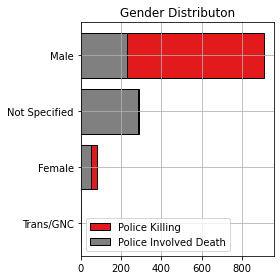

In [18]:
# PID.groupby('first_name').count()['INDEX']
Final_Data['gender']=Final_Data['gender'].replace()


Rep = {
    'Man':'Male',
    'Woman':'Female',
    'Trans Female':'Trans/GNC',
    'Non-Binary':'Trans/GNC'
}

Final_Data['gender'] = Final_Data['gender'].replace(Rep)

B = Final_Data.groupby('gender').count()['INDEX'].sort_values()[-10:]

fig,ax=plt.subplots(1,figsize=(4,4))
ax.barh(B.index,B,color='#e31a1c',edgecolor='k',label='Police Killing')
ax.grid()
ax.set_title('Gender Distributon')
# plt.tight_layout()



B = Final_Data.loc[Final_Data['Type']=='Police Involved Death'].groupby('gender').count()['INDEX'].sort_values()[-10:]

# # fig,ax=plt.subplots(2,figsize=(6,6))
ax.barh(B.index,B,color='grey',edgecolor='k',label='Police Involved Death')
# ax[1].grid()
# ax[1].set_title('Gender Distributon')
plt.tight_layout()

ax.legend()

plt.savefig('docs/images/Gender.png',dpi=400)

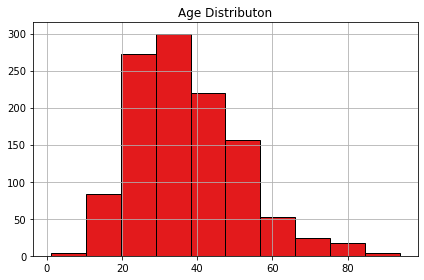

In [19]:
# PID.groupby('first_name').count()['INDEX']
# Final_Data['gender']=Final_Data['gender'].replace({'Trans Female':'Female'})
B = Final_Data.groupby('gender').count()['INDEX'].sort_values()[-10:]

fig,ax=plt.subplots()
ax.hist(Final_Data['age'],color='#e31a1c',edgecolor='k')
ax.grid()
plt.tight_layout()
ax.set_title('Age Distributon')
plt.tight_layout()
plt.savefig('docs/images/age.png',dpi=400)

In [20]:
# Year = [2000,2010,2016]
# # Year = [2021]
# Pop = 38

# for y in Year:

#     Set = PID.loc[PID.index.year>=y]
#     print('Deaths Since ',y, ':',Set.count()['INDEX'])
#     print('Rate:',Set.count()['INDEX']/38/(2022-y))
#     print()
    
#     print('Killings Since ',y, ':',(Set.groupby('Type').count()['INDEX'])[1:].values[0])
# #     print()
#     print('Rate: ',(Set.groupby('Type').count()['INDEX']/Pop/(2022-y))[1:].values[0])
#     print()
#     print()
print(PID.groupby('Type').count()['INDEX'].sort_values())

Type
Off-Duty/Retired          10
Police Killing           717
Police Involved Death    798
Name: INDEX, dtype: int64


In [21]:
Set.groupby('prov').count()['INDEX'].sort_values()

prov
PE      1
NT      2
YT      2
NL      3
NB      6
NU      7
NS      9
SK     30
MB     39
AB     85
QC    103
BC    108
ON    177
Name: INDEX, dtype: int64

In [22]:
from geopy.geocoders import MapBox
import folium
access_token="pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2twY3g4aXloMWFlcDJzbXN3aG95aG5uZiJ9.mFiJt0MIfL1MiJ2rB2xhKQ"

geolocator = MapBox(api_key=access_token)

def plot_point(Map,X,Y,Popup_Text,Color='red',Radius=5,Opacity=.75,LineColor='black',LineWidth=.15):
    folium.CircleMarker(
        # The coordiatnates
        location=[X,Y],
        # Text description
        popup=Popup_Text,
        # sets the fill color for the point
        fill_color=Color,
        # Size of the marker
        radius=Radius,
        # Opacity of the circle
        fill_opacity = Opacity,
        # Sets the line color for the edge
        color=LineColor,
        # Width of the border line
        line_weight=LineWidth,
    ).add_to(Map)
    
CA_coords = geolocator.geocode('Canada')


## We can set the basemap to a basic black and white
CAMap = folium.Map(
    location=[CA_coords.latitude,CA_coords.longitude],
    zoom_start=3,
#     tiles='Stamen Toner'
)

color_Scheme={
    
}
PID_Sel = pd.read_csv('Spatial_Data/Geocoded_Points_not_Complete/PID_locations.csv',
                  index_col=['date'],parse_dates=['date'])

Rep = {
       'Altercation':'Other Killings', 
       'Starlight Tour':'Other Killings', 
       'Post-Intervention':'Other Deaths', 
       'Dangerous Driving':'Traffic Incident',
       'Police Involved Death':'Other Deaths', 
       'Off-Duty/Retired':'Other Deaths', 
       'Pursuit':'Traffic Incident',
       'Intervention':'Other Deaths', 
       'Use of Force':'Other Killings',
       'In Custody':'Other Deaths',
       'Wellness Check':'Other Deaths',
       ' ':'Other Deaths',
      }

PID_Sel['circumstances_of_death'] = PID_Sel['circumstances_of_death'].fillna('')
PID_Sel['circumstances_of_death'] = PID_Sel['circumstances_of_death'].replace(Rep)


group1 = folium.FeatureGroup(name='Shootings since 2000')
group2 = folium.FeatureGroup(name='Other Killings since 2000')
group3 = folium.FeatureGroup(name='Police Involved Deaths (Trafic Incidents) since 2000')
group4 = folium.FeatureGroup(name='Other Police Involved Deaths since 2000')

Color_Scheme = {'Shooting':'#e31a1c','Other Killings':'#fb9a99','Other Deaths':'#d9d9d9',
                'Traffic Incident':'#949494'}

Grp = {'Shooting':group1,
       'Other Killings':group2,
       'Other Deaths':group3,
       'Traffic Incident':group4}

PID_Sel[['race','gender','age','city_town','prov','postal_code']]=PID_Sel[['race','gender','age','city_town','prov','postal_code']].fillna('')
for index, row in PID_Sel.iterrows():
#     # if the geocoding didn't fail, we'll plot the point, colored by the province
    if ((row['geocoding_notes'] != 'Failed')and
       (row['geocoding_notes'] != 'Duplicated Point')):
# #         print(row['latitude'],row['longitude'])
#         Grp = 
        plot_point(Map=Grp[row['circumstances_of_death']],
                   X=row['latitude'],
                   Y=row['longitude'],
                   Popup_Text=row['cause_death']+'\n\n'+row['department'],
                   Color=Color_Scheme[row['circumstances_of_death']]
                  )

group1.add_to(CAMap)
group2.add_to(CAMap)
group3.add_to(CAMap)
group4.add_to(CAMap)
folium.LayerControl().add_to(CAMap)
CAMap

In [23]:

CAMap.save('Police_Involved_Deaths.html')

In [24]:
Shape_file='SimplyAnalytics_Shapefiles_2021-11-29_20_15_27_4b79edd356a1fcb0ee4d5173ac9d8d6f'

import zipfile
# import pandas as pd
# 'SimplyAnalytics_Shapefiles_2021-11-07_04_12_18_e28bde0952164f8aa648e288cab05f1b'
with zipfile.ZipFile('Spatial_Data/2021/Prov/'+Shape_file+'.zip', 'r') as zip_ref:
    zip_ref.extractall('Spatial_Data/2021/Prov/')
# print()
meta_data = pd.read_csv('Spatial_Data/2021/Prov/variable_names.txt',header=None,sep='#')
print(meta_data.values)

[['VALUE0\t'
  ' Household Population by Aboriginal Identity | Household Population For Aboriginal Identity | Aboriginal Identity, 2021']
 ['VALUE1\t' ' Basics | Total Population, 2021']
 ['VALUE2\t'
  ' Household Population by Visible Minority Status | Household Population For Visible Minority | Visible Minority Total | Visible Minority Black, 2021']
 ['VALUE3\t'
  ' Household Population by Visible Minority Status | Household Population For Visible Minority | Visible Minority Total, 2021']]


In [25]:
import datetime as dt
Years = (dt.datetime.now().year+dt.datetime.now().timetuple().tm_yday/365-2000)

C:\Users\User\AppData\Local\Temp/ipykernel_16016/3540216945.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Num = Prov.sum()


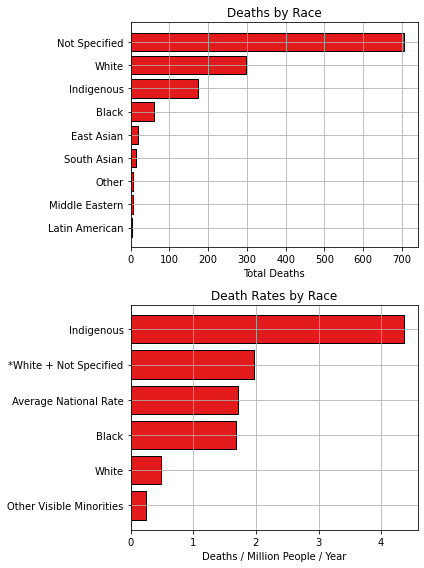

In [26]:
# import geopandas as gpd

# the .read_file() function reads shapefiles
Prov = gpd.read_file('Spatial_Data/2021/Prov/'+Shape_file+'.shp')
Prov = Prov.to_crs(CA.crs)
# print(Prov.crs)

## Note - This is the terminology used by the census
## It can be found in the variable_name file that comes with the download
Prov = Prov.rename(columns={
'VALUE0': 'Indigenous Pop',
'VALUE1': 'Total Pop',
'VALUE2': 'Black Pop',
'VALUE3': 'Visible Minority Pop'
})

Prov['White Pop'] = Prov['Total Pop'] -(Prov['Visible Minority Pop']+Prov['Indigenous Pop'])
Prov['Visible Minority Pop (non-Black)'] = Prov['Visible Minority Pop']-Prov['Black Pop']

Prov.head()
# Prov['Indigenous Identity'].describe()

Prov['prov'] = Prov['name'].replace(can_province_abbrev)
Prov = Prov.set_index('prov')

Demos = ['Indigenous','White','Black','Other Visible Minorities','*White + Not Specified','Average National Rate']
PID['Demographic']='Other Visible Minorities'
for d in Demos[:3]:
    PID.loc[PID['race']==d,'Demographic']=d

PID.loc[PID['race']=='Not Specified','Demographic']='Not Specified'

Demo = PID.groupby(['prov','Demographic']).count()['INDEX'].unstack()

Demo['Total'] = Demo.sum(axis=1)

# print(Demo)
Prov = Prov.join(Demo)

Num = Prov.sum()


Rates = []
Rates.append(Num['Indigenous']/Num['Indigenous Pop']*1e6/Years)
Rates.append(Num['White']/Num['White Pop']*1e6/Years)
Rates.append(Num['Black']/Num['Black Pop']*1e6/Years)
Rates.append(Num['Other Visible Minorities']/Num['Visible Minority Pop (non-Black)']*1e6/Years)
Rates.append((Num['White']+Num['Not Specified'])/Num['White Pop']*1e6/Years)
Rates.append(Num['Total']/Num['Total Pop']*1e6/Years)

# print(Num)

Data = pd.DataFrame(data={'Rates':Rates,
                         'Demographic':Demos})

Data=Data.sort_values(by='Rates')


B = Final_Data.groupby('race').count()['INDEX'].sort_values()[-10:]

fig,ax=plt.subplots(2,figsize=(6,8))
ax[0].barh(B.index,B,color='#e31a1c',edgecolor='k')
ax[0].grid()
ax[0].set_xlabel('Total Deaths')

ax[0].set_title('Deaths by Race',fontsize=12)

ax[1].barh(Data['Demographic'],Data['Rates'],color='#e31a1c',edgecolor='k')
ax[1].grid()
ax[1].set_title('Death Rates by Race',fontsize=12)
ax[1].set_xlabel('Deaths / Million People / Year')
plt.tight_layout()
plt.savefig('docs/images/Race_Normalized.png',dpi=400)

In [27]:
print(Data)

      Rates               Demographic
3  0.248855  Other Visible Minorities
1  0.480773                     White
2  1.680677                     Black
5  1.720470     Average National Rate
4  1.976152    *White + Not Specified
0  4.361998                Indigenous
